In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# 데이텨 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 데이터 확인
print("훈련 데이터 크기: ", x_train.shape)
print("테스트 데이터 크기: ", x_test.shape)

훈련 데이터 크기:  (60000, 28, 28)
테스트 데이터 크기:  (10000, 28, 28)


In [4]:
# 데이터 정규화
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
# 데이터 차원 변경
# CNN은 4차원 입력을 요구함(B, H, W, C)
x_train = x_train.reshape(-1, 28, 28, 1) # 채널 추가
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
# 라벨 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [8]:
# Sequential API를 이용한 CNN 모델 정의
model = Sequential()

In [9]:
# 첫 번째 합성 곱 레이어와 활성화 함수
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))

# 최대 풀링 레이어
model.add(MaxPooling2D(pool_size=(2, 2)))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 두 번째 합성곱 레이어와 최대 풀링 레이어
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [11]:
# 평탄화 레이어 (Fully Connected 레이어에 입력하기 위해 1차원으로 변환)
model.add(Flatten())

In [12]:
# 완전 연결층과 출력층
model.add(Dense(128, activation='relu')) # 은닉층
model.add(Dense(10, activation='softmax')) # 출력층 (10개 클래스)


In [13]:
# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 모델 컴파일
model.compile(optimizer='adam', # 최적화 함수
loss='categorical_crossentropy', # 손실 함수
metrics=['accuracy']) # 평가 메트릭
# 모델 학습
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8858 - loss: 0.3617 - val_accuracy: 0.9764 - val_loss: 0.0808
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9839 - loss: 0.0506 - val_accuracy: 0.9836 - val_loss: 0.0560
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9893 - loss: 0.0325 - val_accuracy: 0.9844 - val_loss: 0.0543
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9880 - val_loss: 0.0409
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9943 - loss: 0.0164 - val_accuracy: 0.9891 - val_loss: 0.0453
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9953 - loss: 0.0128 - val_accuracy: 0.9893 - val_loss: 0.0377
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9968 - loss: 0.0086 - val_accuracy: 0.9907 - val_loss: 0.0434
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9971 -

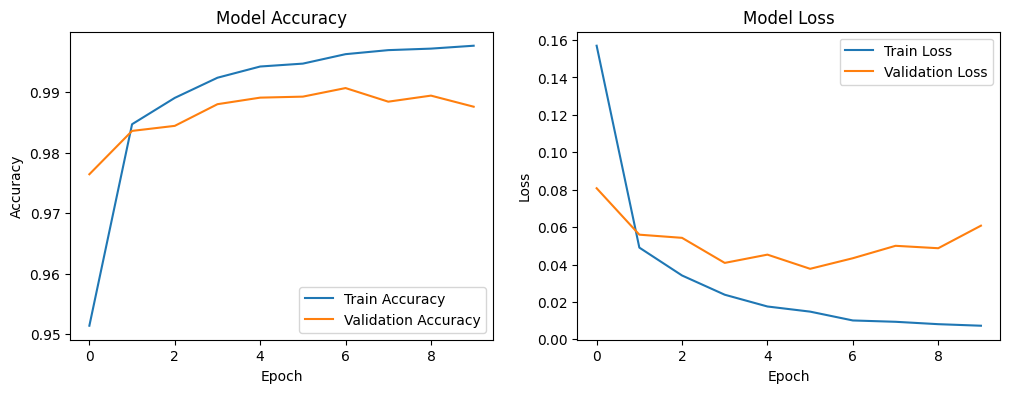

In [ ]:
# 학습 결과 시각화
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# 테스트 데이터로 성능 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"테스트 손실: {test_loss:.4f}")
print(f"테스트 정확도: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9822 - loss: 0.0684
테스트 손실: 0.0527
테스트 정확도: 0.9871
